In [1]:
import pyodbc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Nos conectamos a la base de datos y leemos
conn = pyodbc.connect(Trusted_Connection='yes', 
                      driver = '{SQL Server}',
                      server = 'PC-JOSALO\SQLEXPRESSSERVER', 
                      database = 'GPU_DATABASE')

data = pd.read_sql('select * from gpu_data', conn)

C:\Users\Josemaria Saldias\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
data.head()

,product_specs_gpu_line_family_brand_brand_name,product_specs_gpu_name,product_brand_name,product_specs_gpu_stream_processors,product_specs_gpu_unicode,product_specs_core_clock,product_specs_memory_quantity_value,product_specs_memory_bus_width_value,product_specs_memory_type_name,product_specs_gpu_tdp,product_specs_length,product_specs_bus_unicode,metadata_normal_price_usd,metadata_offer_price_usd,precio_normal_pesos_chilenos,precio_oferta_pesos_chilenos,conectores_de_video,link_tarjeta,fecha_obtencion_info,resolucion_maxima_soportada
0,NVIDIA,RTX 3090,PNY,10496,NVIDIA GeForce RTX 3090,1695,24576,384,GDDR6X,350,317,PCI Express 4.0 x16,1847.14,1754.78,1463158.0,1390000.0,3x DisplayPort; 1x HDMI,https://www.solotodo.cl/products/92309,2023-03-31,4K
1,NVIDIA,RTX 4080,MSI,9728,NVIDIA GeForce RTX 4080,2550,16384,256,GDDR6X,320,322,PCI Express 4.0 x16,1581.37,1502.30,1252632.0,1190000.0,3x Display Port 1.4a; 1x HDMI 2.1,https://www.solotodo.cl/products/155471,2023-03-31,8K
2,AMD,RX 6750 XT,Sapphire,2560,AMD Radeon RX 6750 XT,2618,12288,192,GDDR6,250,280,PCI Express 4.0 x16,631.09,631.09,499900.0,499900.0,3x DisplayPort; 1x HDMI,https://www.solotodo.cl/products/144415,2023-03-31,1440p
3,NVIDIA,RTX 4090,Zotac,16384,NVIDIA GeForce RTX 4090,2580,24576,384,GDDR6X,450,356,PCI Express 4.0 x16,2293.84,2252.79,1817000.0,1784480.0,3x DisplayPort; 1x HDMI,https://www.solotodo.cl/products/169420,2023-03-31,8K
4,NVIDIA,RTX 4090,Zotac,16384,NVIDIA GeForce RTX 4090,2535,24576,384,GDDR6X,450,356,PCI Express 4.0 x16,2157.78,2114.62,1703176.0,1669112.0,3x DisplayPort; 1x HDMI,https://www.solotodo.cl/products/154177,2023-03-31,8K


## Cambiamos el nombre de las columnas a nombres mas claros

In [4]:
data = data.rename(columns={'product_specs_gpu_line_family_brand_brand_name': 'marca',
                            'product_specs_gpu_name': 'modelo',
                            'product_brand_name': 'fabricante',
                            'product_specs_gpu_stream_processors': 'nucleos_de_procesamiento',
                            'product_specs_gpu_unicode': 'nombre_comercial',
                            'product_specs_core_clock': 'core_clock',
                            'product_specs_memory_quantity_value': 'cantidad_memoria_ram',
                            'product_specs_memory_bus_width_value': 'ancho_banda_bus',
                            'product_specs_memory_type_name': 'tipo_de_memoria',
                            'product_specs_gpu_tdp': 'consumo_tdp',
                            'product_specs_length': 'largo',
                            'product_specs_bus_unicode': 'puerto_pci',
                            'metadata_normal_price_usd': 'precio_normal_dolares',
                            'metadata_offer_price_usd': 'precio_oferta_dolares'
                           }
                  )

In [5]:
data.head()

,marca,modelo,fabricante,nucleos_de_procesamiento,nombre_comercial,core_clock,cantidad_memoria_ram,ancho_banda_bus,tipo_de_memoria,consumo_tdp,largo,puerto_pci,precio_normal_dolares,precio_oferta_dolares,precio_normal_pesos_chilenos,precio_oferta_pesos_chilenos,conectores_de_video,link_tarjeta,fecha_obtencion_info,resolucion_maxima_soportada
0,NVIDIA,RTX 3090,PNY,10496,NVIDIA GeForce RTX 3090,1695,24576,384,GDDR6X,350,317,PCI Express 4.0 x16,1847.14,1754.78,1463158.0,1390000.0,3x DisplayPort; 1x HDMI,https://www.solotodo.cl/products/92309,2023-03-31,4K
1,NVIDIA,RTX 4080,MSI,9728,NVIDIA GeForce RTX 4080,2550,16384,256,GDDR6X,320,322,PCI Express 4.0 x16,1581.37,1502.30,1252632.0,1190000.0,3x Display Port 1.4a; 1x HDMI 2.1,https://www.solotodo.cl/products/155471,2023-03-31,8K
2,AMD,RX 6750 XT,Sapphire,2560,AMD Radeon RX 6750 XT,2618,12288,192,GDDR6,250,280,PCI Express 4.0 x16,631.09,631.09,499900.0,499900.0,3x DisplayPort; 1x HDMI,https://www.solotodo.cl/products/144415,2023-03-31,1440p
3,NVIDIA,RTX 4090,Zotac,16384,NVIDIA GeForce RTX 4090,2580,24576,384,GDDR6X,450,356,PCI Express 4.0 x16,2293.84,2252.79,1817000.0,1784480.0,3x DisplayPort; 1x HDMI,https://www.solotodo.cl/products/169420,2023-03-31,8K
4,NVIDIA,RTX 4090,Zotac,16384,NVIDIA GeForce RTX 4090,2535,24576,384,GDDR6X,450,356,PCI Express 4.0 x16,2157.78,2114.62,1703176.0,1669112.0,3x DisplayPort; 1x HDMI,https://www.solotodo.cl/products/154177,2023-03-31,8K


## Analicemos si hay duplicados en los datos y valores nulos

In [6]:
df_duplicados = data[data.duplicated() == True]
if len(df_duplicados) == 0:
    print('No hay duplicados en el dataset')
else:
    print(df_duplicados)

No hay duplicados en el dataset


In [7]:
# Ahora veamos los valores nulos
data.isnull().sum()

marca                           0
modelo                          0
fabricante                      0
nucleos_de_procesamiento        0
nombre_comercial                0
core_clock                      0
cantidad_memoria_ram            0
ancho_banda_bus                 0
tipo_de_memoria                 0
consumo_tdp                     0
largo                           0
puerto_pci                      0
precio_normal_dolares           0
precio_oferta_dolares           0
precio_normal_pesos_chilenos    0
precio_oferta_pesos_chilenos    0
conectores_de_video             0
link_tarjeta                    0
fecha_obtencion_info            0
resolucion_maxima_soportada     0
dtype: int64

## Analicemos los precios normales en pesos chilenos para NVIDIA

In [8]:
data.dtypes

marca                            object
modelo                           object
fabricante                       object
nucleos_de_procesamiento          int64
nombre_comercial                 object
core_clock                        int64
cantidad_memoria_ram              int64
ancho_banda_bus                   int64
tipo_de_memoria                  object
consumo_tdp                       int64
largo                             int64
puerto_pci                       object
precio_normal_dolares           float64
precio_oferta_dolares           float64
precio_normal_pesos_chilenos    float64
precio_oferta_pesos_chilenos    float64
conectores_de_video              object
link_tarjeta                     object
fecha_obtencion_info             object
resolucion_maxima_soportada      object
dtype: object

In [9]:
data['fecha_obtencion_info'] = pd.to_datetime(data['fecha_obtencion_info'])

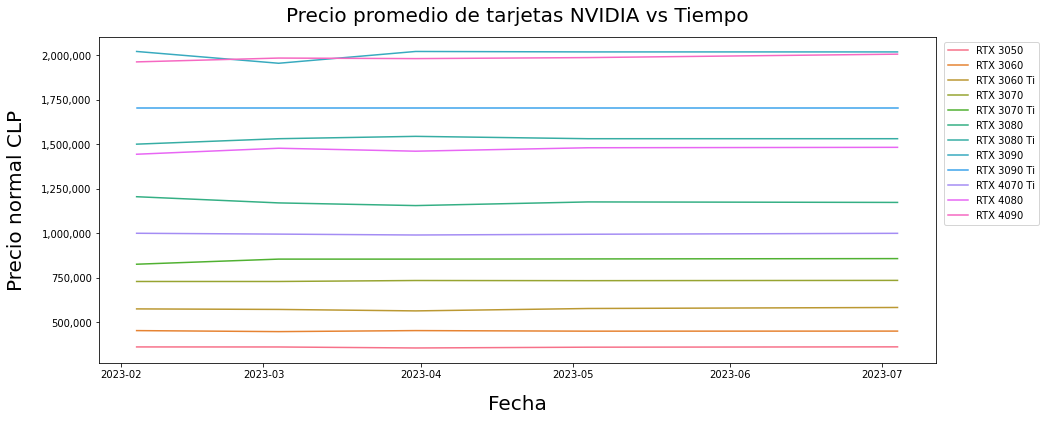

In [10]:
nvidia_df = data.loc[data['marca'] == 'NVIDIA' ]
nvidia_df = nvidia_df[['modelo', 'fecha_obtencion_info', 'precio_normal_pesos_chilenos']]#.groupby('modelo')['precio_normal_pesos_chilenos'].mean().sort_values(ascending=False).to_frame()
nvidia_df = nvidia_df.groupby(['modelo', 'fecha_obtencion_info'])['precio_normal_pesos_chilenos'].agg(['mean'])
nvidia_df = nvidia_df.rename(columns={'mean':'avg_normal_price'})
plt.figure(figsize=(15,6))
ax = sns.lineplot(x='fecha_obtencion_info', y='avg_normal_price', hue='modelo', data=nvidia_df, errorbar=None)
plt.legend(loc='upper right', bbox_to_anchor=(1.13, 1))
plt.xlabel('Fecha', fontsize=20, labelpad=15)
plt.ylabel('Precio normal CLP', fontsize=20, labelpad=15)
plt.title('Precio promedio de tarjetas NVIDIA vs Tiempo', fontsize=20, pad=15)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

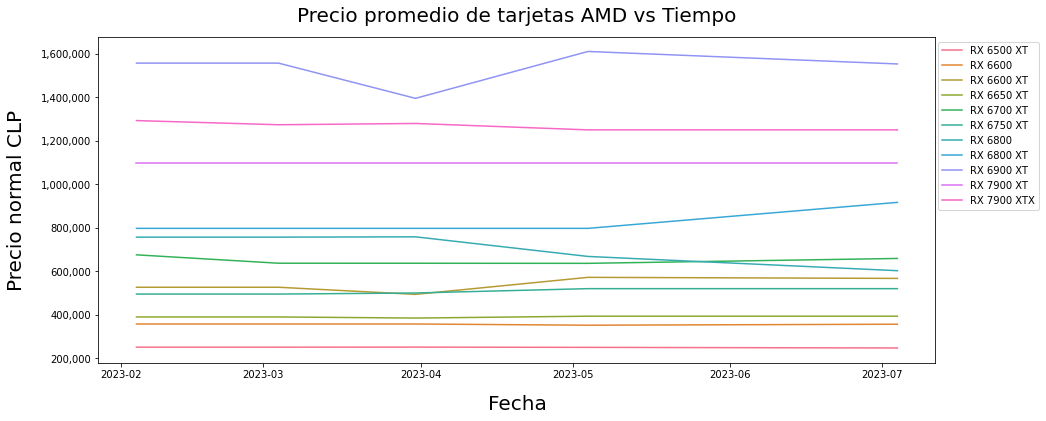

In [11]:
# Analicemos el precio de las AMD
amd_df = data.loc[data['marca'] == 'AMD' ]
amd_df = amd_df[['modelo', 'fecha_obtencion_info', 'precio_normal_pesos_chilenos']]#.groupby('modelo')['precio_normal_pesos_chilenos'].mean().sort_values(ascending=False).to_frame()
amd_df = amd_df.groupby(['modelo', 'fecha_obtencion_info'])['precio_normal_pesos_chilenos'].agg(['mean'])
amd_df = amd_df.rename(columns={'mean':'avg_normal_price'})
plt.figure(figsize=(15,6))
ax = sns.lineplot(x='fecha_obtencion_info', y='avg_normal_price', hue='modelo', data=amd_df, errorbar=None)
plt.legend(loc='upper right', bbox_to_anchor=(1.13, 1))
plt.xlabel('Fecha', fontsize=20, labelpad=15)
plt.ylabel('Precio normal CLP', fontsize=20, labelpad=15)
plt.title('Precio promedio de tarjetas AMD vs Tiempo', fontsize=20, pad=15)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

## Distribución de precios normales para NVIDIA y AMD

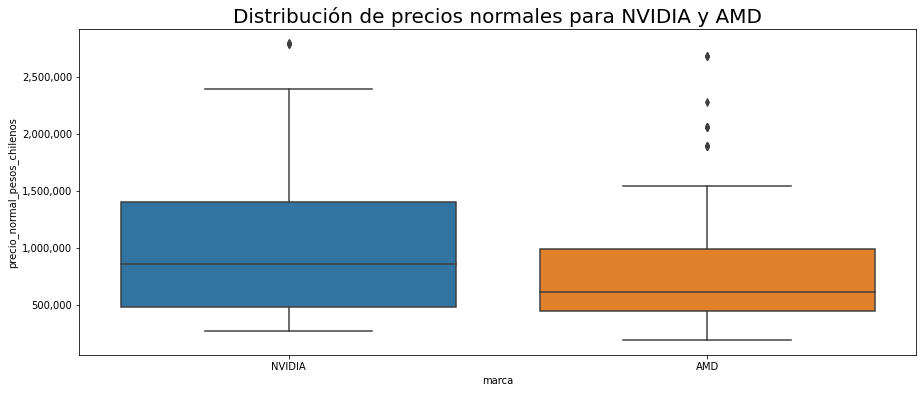

In [12]:
# Grafiquemos la distribución de los precios usando un boxplot
plt.figure(figsize=(15,6))
ax = sns.boxplot(data=data, y='precio_normal_pesos_chilenos', x='marca')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Distribución de precios normales para NVIDIA y AMD', fontsize=20)
plt.show()

Vemos que hay outliers. Identifiquémos cuales son

In [13]:
nvidia_prices = data['precio_normal_pesos_chilenos'].loc[data['marca'] == 'NVIDIA']
Q3_nvidia = np.quantile(nvidia_prices, 0.75)
Q1_nvidia = np.quantile(nvidia_prices, 0.25)
IQR_nvidia = Q3_nvidia - Q1_nvidia
upper_bound_nvidia = Q3_nvidia + 1.5*IQR_nvidia
lower_bound_nvidia = Q1_nvidia - 1.5*IQR_nvidia
print('NVIDIA Bounds: ', lower_bound_nvidia, upper_bound_nvidia)

amd_prices = data['precio_normal_pesos_chilenos'].loc[data['marca'] == 'AMD']
Q3_amd = np.quantile(amd_prices, 0.75)
Q1_amd = np.quantile(amd_prices, 0.25)
IQR_amd = Q3_amd - Q1_amd
upper_bound_amd = Q3_amd + 1.5*IQR_amd
lower_bound_amd = Q1_amd - 1.5*IQR_amd
print('AMD Bounds: ', lower_bound_amd, upper_bound_amd)

NVIDIA Bounds:  -892353.75 2775396.25
AMD Bounds:  -369510.0 1802490.0


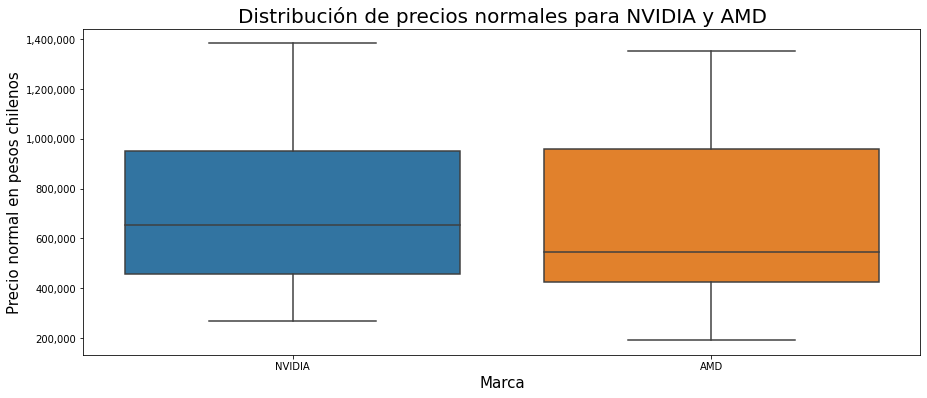

In [14]:
# Filtramos los outliers de los datos
filtered_prices = data.loc[(data['precio_normal_pesos_chilenos'] < Q3_nvidia)]
plt.figure(figsize=(15,6))
ax = sns.boxplot(data=filtered_prices, y='precio_normal_pesos_chilenos', x='marca')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Distribución de precios normales para NVIDIA y AMD', fontsize=20)
plt.ylabel('Precio normal en pesos chilenos', fontsize=15)
plt.xlabel('Marca', fontsize=15)
plt.show()

La mediana de precios para NVIDIA es superior a 600.000 pesos, en cambio para AMD es de menos de 600.000 pesos chilenos. El 75% de los precios de AMD y de NVIDIA son inferiores a 1.000.000 de pesos aprox.

In [15]:
filtered_prices.describe()

,nucleos_de_procesamiento,core_clock,cantidad_memoria_ram,ancho_banda_bus,consumo_tdp,largo,precio_normal_dolares,precio_oferta_dolares,precio_normal_pesos_chilenos,precio_oferta_pesos_chilenos
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,9.550000e+02,9.550000e+02
mean,4872.192670,2067.302618,10728.946597,218.136126,225.570681,274.918325,876.059770,846.087571,7.000676e+05,6.761601e+05
std,2385.404514,426.106904,3732.980303,73.221830,69.739061,48.913281,396.975701,381.080889,3.172131e+05,3.045553e+05
min,1024.000000,0.000000,4096.000000,64.000000,107.000000,0.000000,236.810000,236.810000,1.919900e+05,1.919900e+05
25%,2560.000000,1770.000000,8192.000000,128.000000,170.000000,242.500000,562.630000,542.775000,4.521700e+05,4.299900e+05
50%,4664.000000,1825.000000,8192.000000,256.000000,220.000000,282.000000,783.890000,758.610000,6.307640e+05,6.099000e+05
75%,6144.000000,2535.000000,12288.000000,256.000000,290.000000,316.000000,1194.180000,1161.430000,9.503420e+05,9.265300e+05
max,10240.000000,2825.000000,24576.000000,384.000000,355.000000,356.000000,1748.460000,1643.660000,1.382872e+06,1.299990e+06


## Distribución de precios de oferta para NVIDIA y AMD

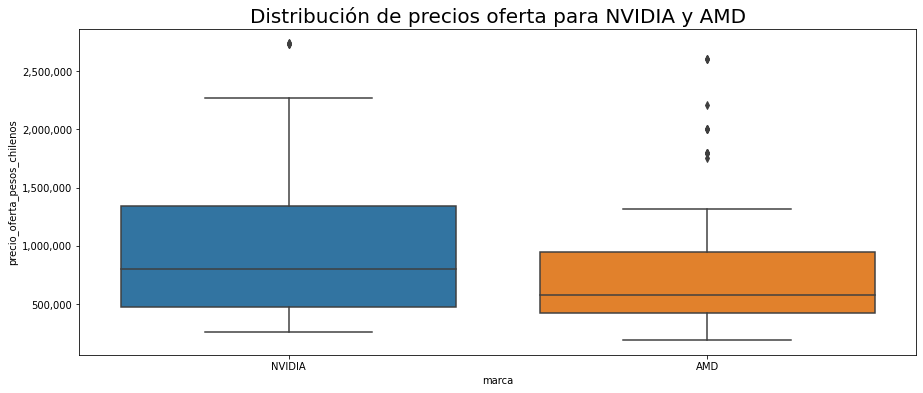

In [16]:
# Grafiquemos la distribución de los precios usando un boxplot
plt.figure(figsize=(15,6))
ax = sns.boxplot(data=data, y='precio_oferta_pesos_chilenos', x='marca')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Distribución de precios oferta para NVIDIA y AMD', fontsize=20)
plt.show()

In [17]:
nvidia_prices = data['precio_oferta_pesos_chilenos'].loc[data['marca'] == 'NVIDIA']
Q3_nvidia = np.quantile(nvidia_prices, 0.75)
Q1_nvidia = np.quantile(nvidia_prices, 0.25)
IQR_nvidia = Q3_nvidia - Q1_nvidia
upper_bound_nvidia = Q3_nvidia + 1.5*IQR_nvidia
lower_bound_nvidia = Q1_nvidia - 1.5*IQR_nvidia
print('NVIDIA Bounds: ', lower_bound_nvidia, upper_bound_nvidia)

amd_prices = data['precio_oferta_pesos_chilenos'].loc[data['marca'] == 'AMD']
Q3_amd = np.quantile(amd_prices, 0.75)
Q1_amd = np.quantile(amd_prices, 0.25)
IQR_amd = Q3_amd - Q1_amd
upper_bound_amd = Q3_amd + 1.5*IQR_amd
lower_bound_amd = Q1_amd - 1.5*IQR_amd
print('AMD Bounds: ', lower_bound_amd, upper_bound_amd)

NVIDIA Bounds:  -824937.5 2638946.5
AMD Bounds:  -362510.0 1737490.0


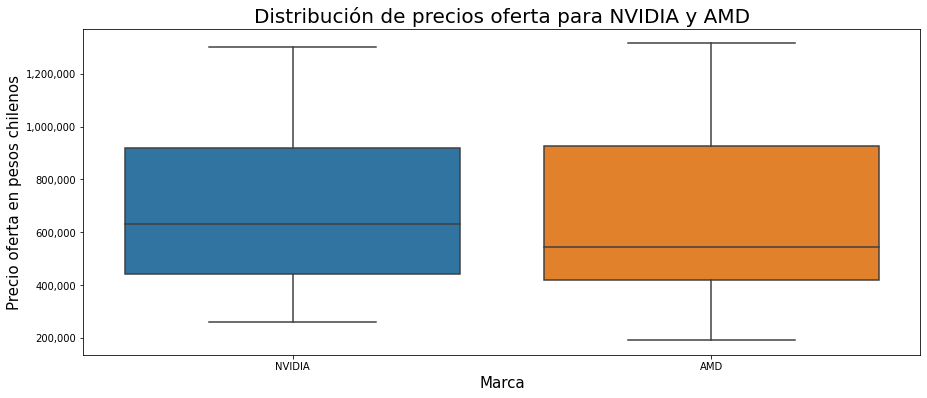

In [18]:
# Filtramos los outliers de los datos
filtered_prices = data.loc[(data['precio_oferta_pesos_chilenos'] < Q3_nvidia)]
plt.figure(figsize=(15,6))
ax = sns.boxplot(data=filtered_prices, y='precio_oferta_pesos_chilenos', x='marca')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Distribución de precios oferta para NVIDIA y AMD', fontsize=20)
plt.ylabel('Precio oferta en pesos chilenos', fontsize=15)
plt.xlabel('Marca', fontsize=15)
plt.show()

In [19]:
filtered_prices.groupby('marca')['precio_oferta_pesos_chilenos'].max()

marca
AMD       1314390.0
NVIDIA    1299990.0
Name: precio_oferta_pesos_chilenos, dtype: float64

In [20]:
filtered_prices.groupby('marca')['precio_oferta_pesos_chilenos'].min()

marca
AMD       191990.0
NVIDIA    259000.0
Name: precio_oferta_pesos_chilenos, dtype: float64

## Modelo que más y menos consumo de energía tiene

In [21]:
data[['nombre_comercial', 'consumo_tdp']].loc[data['consumo_tdp'] == max(data['consumo_tdp'])].head(1)

,nombre_comercial,consumo_tdp
3,NVIDIA GeForce RTX 4090,450


In [22]:
data[['nombre_comercial', 'consumo_tdp']].loc[data['consumo_tdp'] == min(data['consumo_tdp'])].head(1)

,nombre_comercial,consumo_tdp
24,AMD Radeon RX 6500 XT,107


## Gráfica con más y menos nucleos de procesamiento

In [23]:
data[['nombre_comercial', 'nucleos_de_procesamiento']].loc[data['nucleos_de_procesamiento'] == max(data['nucleos_de_procesamiento'])].head(1)

,nombre_comercial,nucleos_de_procesamiento
3,NVIDIA GeForce RTX 4090,16384


In [24]:
data[['nombre_comercial', 'nucleos_de_procesamiento']].loc[data['nucleos_de_procesamiento'] == min(data['nucleos_de_procesamiento'])].head(1)

,nombre_comercial,nucleos_de_procesamiento
24,AMD Radeon RX 6500 XT,1024
